In [1]:
import torch
import torch.nn as nn

In [3]:
# 20 amino acids
aa_vocab = {aa: idx+1 for idx, aa in enumerate('ACDEFGHIKLMNPQRSTVWY')}
aa_vocab

{'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [10]:
# Embedding layer
vocab_size = len(aa_vocab) + 1
embed_dim = 4
embedding = nn.Embedding(vocab_size, embed_dim)
embedding

Embedding(21, 4)

In [11]:
embedding.weight

Parameter containing:
tensor([[-0.5873,  0.0519,  0.6103,  0.2894],
        [-0.6764, -1.8091,  2.2003,  1.3079],
        [ 0.3816,  0.0049, -0.2227, -1.8538],
        [-0.5191, -1.3231, -0.2264,  1.3159],
        [ 0.3298,  0.1247, -0.5189,  0.4930],
        [ 0.6082, -0.3877, -0.8382, -0.1560],
        [ 0.4607, -0.9498,  3.1584, -0.5680],
        [-0.0421,  0.3698,  1.4770,  2.1518],
        [ 0.6863, -1.1343,  0.2274,  1.2098],
        [-1.8810, -1.2391, -1.6031,  1.0896],
        [-1.5637,  1.0234,  0.5173, -0.7620],
        [-0.6557,  0.3744,  0.5199, -0.1586],
        [ 2.7932,  0.9437,  0.1121, -0.1801],
        [-0.0768,  0.4806, -0.6332, -1.9728],
        [ 1.2708, -0.7384,  0.6381,  0.9023],
        [-0.2698, -1.1203,  0.6834,  0.1187],
        [ 0.1142, -0.6247,  0.8377,  0.8426],
        [ 0.0824,  1.2932,  0.1004, -0.0560],
        [-1.2135,  2.2226, -0.3827,  1.5515],
        [-2.4358,  1.7214, -1.5165, -1.3535],
        [-0.7421,  0.6455,  0.0437, -0.1844]], requires_gr

In [12]:
# prepare input
ls_antigen = [
    "MRSLLILVLCFLPLAALGKVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL"    
]
X = [[aa_vocab.get(aa, 0) for aa in seq] for seq in ls_antigen]
X

[[11,
  15,
  16,
  10,
  10,
  8,
  10,
  18,
  10,
  2,
  5,
  10,
  13,
  10,
  1,
  1,
  10,
  6,
  9,
  18,
  5,
  6,
  15,
  2,
  4,
  10,
  1,
  1,
  1,
  11,
  9,
  15,
  7,
  6,
  10,
  3,
  12,
  20,
  15,
  6,
  20,
  16,
  10,
  6,
  12,
  19,
  18,
  2,
  1,
  1,
  9,
  5,
  4,
  16,
  12,
  5,
  12,
  17,
  14,
  1,
  17,
  12,
  15,
  12,
  17,
  3,
  6,
  16,
  17,
  3,
  20,
  6,
  8,
  10,
  14,
  8,
  12,
  16,
  15,
  19,
  19,
  2,
  12,
  3,
  6,
  15,
  17,
  13,
  6,
  16,
  15,
  12,
  10,
  2,
  12,
  8,
  13,
  2,
  16,
  1,
  10,
  10,
  16,
  16,
  3,
  8,
  17,
  1,
  16,
  18,
  12,
  2,
  1,
  9,
  9,
  8,
  18,
  16,
  3,
  6,
  12,
  6,
  11,
  12,
  1,
  19,
  18,
  1,
  19,
  15,
  12,
  15,
  2,
  9,
  6,
  17,
  3,
  18,
  14,
  1,
  19,
  8,
  15,
  6,
  2,
  15,
  10]]

In [32]:
first_seq = X[0]
print("Length of first sequence:", len(first_seq))

Length of first sequence: 147


In [25]:
data = torch.tensor(X)
data_embedding = embedding(data)
data_embedding

tensor([[[-0.6557,  0.3744,  0.5199, -0.1586],
         [-0.2698, -1.1203,  0.6834,  0.1187],
         [ 0.1142, -0.6247,  0.8377,  0.8426],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [ 0.6863, -1.1343,  0.2274,  1.2098],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [-1.2135,  2.2226, -0.3827,  1.5515],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [ 0.3816,  0.0049, -0.2227, -1.8538],
         [ 0.6082, -0.3877, -0.8382, -0.1560],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [-0.0768,  0.4806, -0.6332, -1.9728],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [-0.6764, -1.8091,  2.2003,  1.3079],
         [-0.6764, -1.8091,  2.2003,  1.3079],
         [-1.5637,  1.0234,  0.5173, -0.7620],
         [ 0.4607, -0.9498,  3.1584, -0.5680],
         [-1.8810, -1.2391, -1.6031,  1.0896],
         [-1.2135,  2.2226, -0.3827,  1.5515],
         [ 0.6082, -0.3877, -0.8382, -0.1560],
         [ 0.

In [26]:
# convert index 11 into embedding vector
embedding.weight[11]

tensor([-0.6557,  0.3744,  0.5199, -0.1586], grad_fn=<SelectBackward0>)

In [70]:
embedding_dim = embed_dim
hidden_size = 3
activation = 'relu'

model = nn.RNN(
    input_size=embedding_dim,
    hidden_size=hidden_size,
    nonlinearity=activation,
    num_layers=1,
    batch_first=True
)
model

RNN(4, 3, batch_first=True)

In [71]:
model.all_weights

[[Parameter containing:
  tensor([[-0.0243,  0.4623, -0.1535, -0.3986],
          [ 0.2416, -0.3817, -0.4245,  0.5147],
          [-0.5552, -0.1860,  0.0031,  0.1289]], requires_grad=True),
  Parameter containing:
  tensor([[ 0.0467,  0.0692, -0.3441],
          [-0.1571, -0.3797,  0.4840],
          [-0.2029,  0.4749, -0.0158]], requires_grad=True),
  Parameter containing:
  tensor([-0.5697, -0.2317, -0.5073], requires_grad=True),
  Parameter containing:
  tensor([ 0.5400, -0.2625, -0.0516], requires_grad=True)]]

In [72]:
rnn_output, rnn_hidden = model(data_embedding)

# N, L, H_out. Where:
# N: number of sample
# L: number of layer stacking
# H_out: number of hidden node output
print(rnn_output.shape)

# num_layers, N, H_out
print(rnn_hidden.shape)

torch.Size([1, 147, 3])
torch.Size([1, 1, 3])


In [73]:
# last hidden state
rnn_hidden

tensor([[[0.7057, 0.0000, 0.0221]]], grad_fn=<StackBackward0>)

In [74]:
# get last hidden state
rnn_output[:, -1, :]

tensor([[0.7057, 0.0000, 0.0221]], grad_fn=<SliceBackward0>)

In [75]:
import torch.nn.functional as F

# apply sigmoid 
num_residues = len(first_seq)
fc = nn.Linear(hidden_size, num_residues)
output = F.sigmoid(fc(rnn_hidden))
output

tensor([[[0.5703, 0.3785, 0.6810, 0.3735, 0.5928, 0.6167, 0.4568, 0.5601,
          0.6758, 0.3803, 0.4608, 0.5179, 0.5644, 0.4597, 0.3931, 0.4220,
          0.4773, 0.6169, 0.5211, 0.3572, 0.6580, 0.6852, 0.5031, 0.3722,
          0.4301, 0.3472, 0.4625, 0.5662, 0.4520, 0.2919, 0.3886, 0.3047,
          0.3674, 0.6143, 0.5066, 0.4158, 0.4480, 0.4995, 0.4982, 0.4774,
          0.5923, 0.3710, 0.6067, 0.3303, 0.6038, 0.4736, 0.4102, 0.5074,
          0.5153, 0.5463, 0.3488, 0.4076, 0.5550, 0.4194, 0.5493, 0.3982,
          0.5372, 0.4596, 0.5305, 0.3865, 0.6841, 0.4672, 0.5620, 0.4128,
          0.4365, 0.5005, 0.5210, 0.3367, 0.3837, 0.4848, 0.5411, 0.5640,
          0.5313, 0.5289, 0.5919, 0.3060, 0.5600, 0.5154, 0.6225, 0.3753,
          0.3118, 0.5615, 0.4404, 0.5385, 0.5718, 0.3315, 0.5828, 0.4163,
          0.5551, 0.4403, 0.6488, 0.6853, 0.5856, 0.4515, 0.5333, 0.6020,
          0.5931, 0.6878, 0.4875, 0.5514, 0.5378, 0.5607, 0.4153, 0.5304,
          0.3959, 0.4543, 0.3094, 0.48

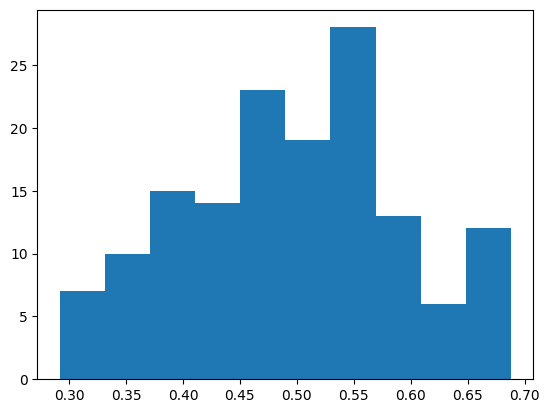

In [76]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(output.detach().numpy().flatten())
plt.show()